### Enron Dataset EDA

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pickle
import random
import math
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data


%matplotlib inline

In [89]:
with open ('final_project_dataset.pkl','rb') as f:
    enron_data = pickle.load(f)

In [90]:
df = pd.DataFrame.from_records(list(enron_data.values()))
persons = pd.Series(list(enron_data.keys()))

df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
1,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
2,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
4,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


In [91]:
df['persons'] = persons

In [92]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
0,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,1740,False,585062,NaN,365788,702,807,1061827,585062,METTS MARK
1,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258,BAXTER JOHN C
2,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735,ELLIOTT STEVEN
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,False,386335,NaN,NaN,58,764,NaN,1038185,CORDES WILLIAM R
4,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,11350,True,853064,NaN,243293,1035,1045,288682,6391065,HANNON KEVIN P


In [93]:
df[df['persons']=='ALLEN PHILLIP K']

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
109,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,152,False,126027,-126027,201955,1407,2902,4484442,1729541,ALLEN PHILLIP K


Let's see what is the distribution of poi is like in the dataset

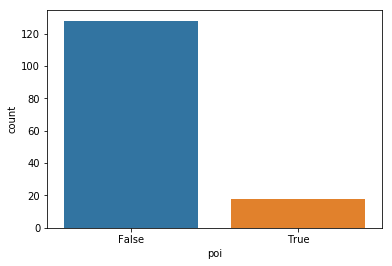

In [94]:
sns.countplot(data = df,x = "poi")

We can see that most of the poi's are really less compared to non poi data points

Analysing the relation between salary/bonus and poi

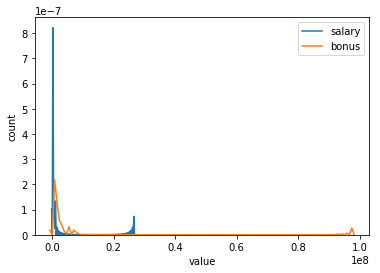

In [95]:
p1 = sns.kdeplot(df['salary'])
p2 = sns.kdeplot(df['bonus'])
plt.xlabel('value')
plt.ylabel('count')

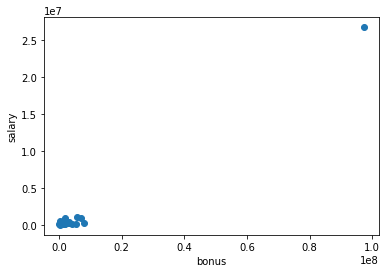

In [96]:
#sns.regplot(x=df["salary"], y=df["bonus"])
plt.plot(df['bonus'],df['salary'],"o")
plt.xlabel('bonus')
plt.ylabel('salary')

^^ There are calealy some outliers, Let's remove them for now, just for simplicity sake. <br>

In [97]:
df['bonus'].describe()

count     146
unique     42
top       NaN
freq       64
Name: bonus, dtype: object

Looks like we have lot of NaNs in the dataset

In [98]:
df.isnull().sum()

bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
email_address                0
exercised_stock_options      0
expenses                     0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
loan_advances                0
long_term_incentive          0
other                        0
poi                          0
restricted_stock             0
restricted_stock_deferred    0
salary                       0
shared_receipt_with_poi      0
to_messages                  0
total_payments               0
total_stock_value            0
persons                      0
dtype: int64

To further clean the data for exploration as matplotlib/seaborn don't work well with NaN, replacing all 'NaN's with 0, And Having a backup DataFrame in case we need to refer something.

In [99]:
df_backup = df

In [100]:
df = df.replace('NaN', 0)

In [101]:
df['salary'].describe()

count    1.460000e+02
mean     3.658114e+05
std      2.203575e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.105960e+05
75%      2.708505e+05
max      2.670423e+07
Name: salary, dtype: float64

In [102]:
df['salary'].max()

26704229

In [103]:
df['bonus'].describe()

count    1.460000e+02
mean     1.333474e+06
std      8.094029e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+05
75%      8.000000e+05
max      9.734362e+07
Name: bonus, dtype: float64

In [104]:
df['bonus'].max()

97343619

In [105]:
df[df['salary']==26704229]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
104,97343619,32083396,-27992891,1398517,0,311764000,5235198,0,0,0,...,42667589,False,130322299,-7576788,26704229,0,0,309886585,434509511,TOTAL


^^ Looks like this number is for 'TOTAL' salary/bonus, we can remove this

In [106]:
df.drop(df.index[[104]],inplace=True)

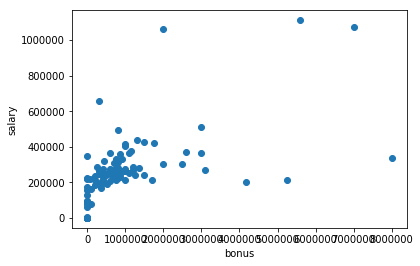

In [107]:
plt.plot(df['bonus'],df['salary'],"o")
plt.xlabel('bonus')
plt.ylabel('salary')

^^ This is a much better representaion of the data.

In [108]:
df[(df['email_address'] == 0) & (df['bonus'] == 0) & (df['exercised_stock_options'] == 0)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
23,0,0,-98784,98784,0,0,0,0,0,0,...,0,False,32460,-32460,0,0,0,0,0,CHAN RONNIE
28,0,0,-36666,36666,0,0,228656,0,0,0,...,0,False,0,0,0,0,0,228656,0,URQUHART JOHN A
35,0,0,-103750,103750,0,0,148,0,0,0,...,0,False,0,0,0,0,0,148,0,MENDELSOHN JOHN
37,0,0,0,0,0,0,0,0,0,0,...,0,False,662086,-472568,0,0,0,0,189518,CLINE KENNETH W
46,0,0,0,109298,0,0,103773,0,0,0,...,0,False,0,0,0,0,0,213071,0,WAKEHAM JOHN
64,0,0,-38346,38346,0,0,2151,0,0,0,...,0,False,0,0,0,0,0,2151,0,MEYER JEROME J
90,0,0,0,0,0,0,0,0,0,0,...,0,False,0,0,0,0,0,0,0,LOCKHART EUGENE E
93,0,0,-101250,101250,0,0,27942,0,0,0,...,0,False,0,0,0,0,0,27942,0,PEREIRA PAULO V. FERRAZ
96,0,0,-113784,113784,0,0,1279,0,0,0,...,0,False,0,0,0,0,0,1279,0,BLAKE JR. NORMAN P
99,0,93585,0,0,0,0,0,0,0,0,...,680833,False,0,0,6615,0,0,1146658,0,GRAY RODNEY


'LOCKHART EUGENE E' and 'THE TRAVEL AGENCY IN THE PARK' have all the features as 0 and 'THE TRAVEL AGENCY IN THE PARK' is not a person.

Dropping these features

In [109]:
df.drop(df.index[[101]],inplace=True)

In [110]:
df.drop(df.index[[90]],inplace=True)

In [111]:
df[(df['email_address'] == 0) & (df['bonus'] == 0) & (df['exercised_stock_options'] == 0)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
23,0,0,-98784,98784,0,0,0,0,0,0,...,0,False,32460,-32460,0,0,0,0,0,CHAN RONNIE
28,0,0,-36666,36666,0,0,228656,0,0,0,...,0,False,0,0,0,0,0,228656,0,URQUHART JOHN A
35,0,0,-103750,103750,0,0,148,0,0,0,...,0,False,0,0,0,0,0,148,0,MENDELSOHN JOHN
37,0,0,0,0,0,0,0,0,0,0,...,0,False,662086,-472568,0,0,0,0,189518,CLINE KENNETH W
46,0,0,0,109298,0,0,103773,0,0,0,...,0,False,0,0,0,0,0,213071,0,WAKEHAM JOHN
64,0,0,-38346,38346,0,0,2151,0,0,0,...,0,False,0,0,0,0,0,2151,0,MEYER JEROME J
93,0,0,-101250,101250,0,0,27942,0,0,0,...,0,False,0,0,0,0,0,27942,0,PEREIRA PAULO V. FERRAZ
96,0,0,-113784,113784,0,0,1279,0,0,0,...,0,False,0,0,0,0,0,1279,0,BLAKE JR. NORMAN P
99,0,93585,0,0,0,0,0,0,0,0,...,680833,False,0,0,6615,0,0,1146658,0,GRAY RODNEY
102,0,774401,0,0,0,0,0,0,0,0,...,0,False,463261,-94556,0,0,0,774401,368705,NOLES JAMES L


Now that we have removed the outliers let's see how the distribution of different features is

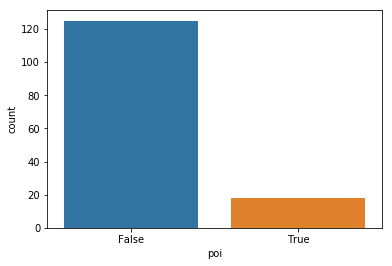

In [112]:
sns.countplot(data = df,x = "poi")

In [113]:
poic = df[df['poi'] == True].persons.count()
npoic = df[df['poi'] != True].persons.count()

In [114]:
poic,npoic

(18, 125)

Again, The number of 'poi's is actaually really less in the dataset.

In [115]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value', u'persons'],
      dtype='object')

In [116]:
df_poi = df[df['poi'] == True]
df_npoi = df[df['poi'] != True]

Let's See how different features are distributed

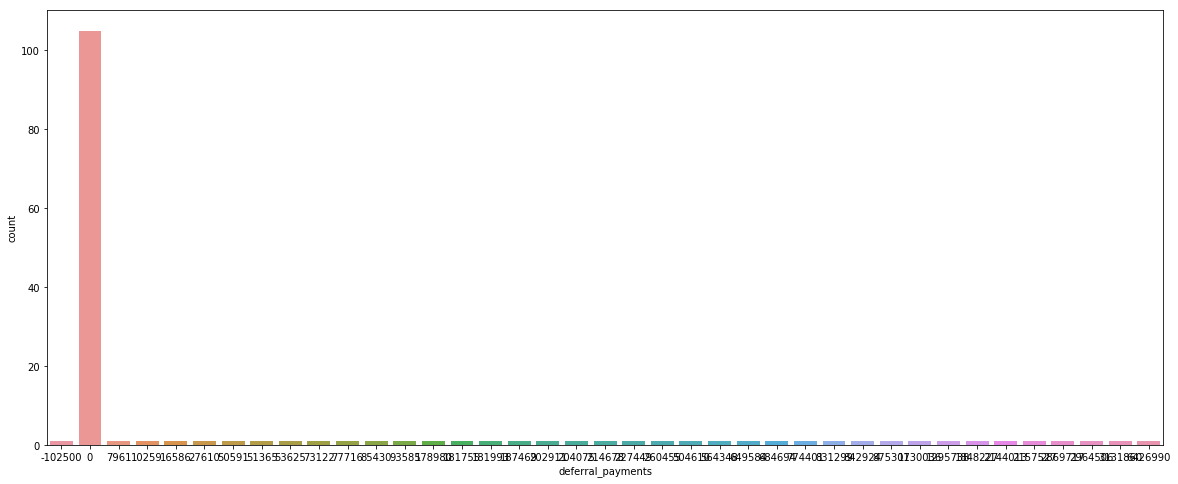

In [117]:
#fig, ax = plt.subplots()
plt.subplots(figsize=(20,8))
sns.countplot(df['deferral_payments'])

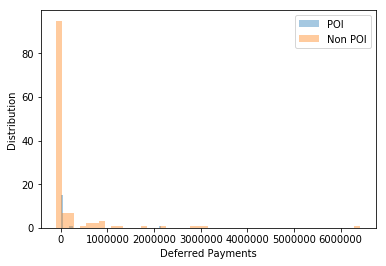

In [118]:
sns.distplot(df_poi['deferral_payments'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['deferral_payments'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Deferred Payments')
plt.ylabel('Distribution')
plt.legend()

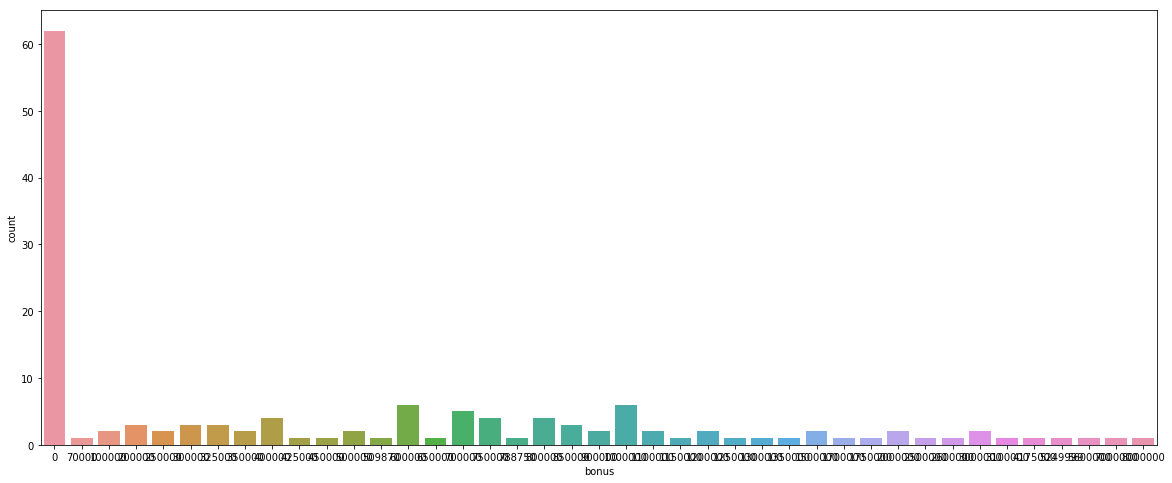

In [119]:
plt.subplots(figsize=(20,8))
sns.countplot(df['bonus'])

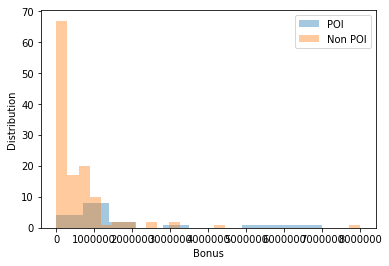

In [120]:

sns.distplot(df_poi['bonus'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['bonus'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Bonus')
plt.ylabel('Distribution')
plt.legend()

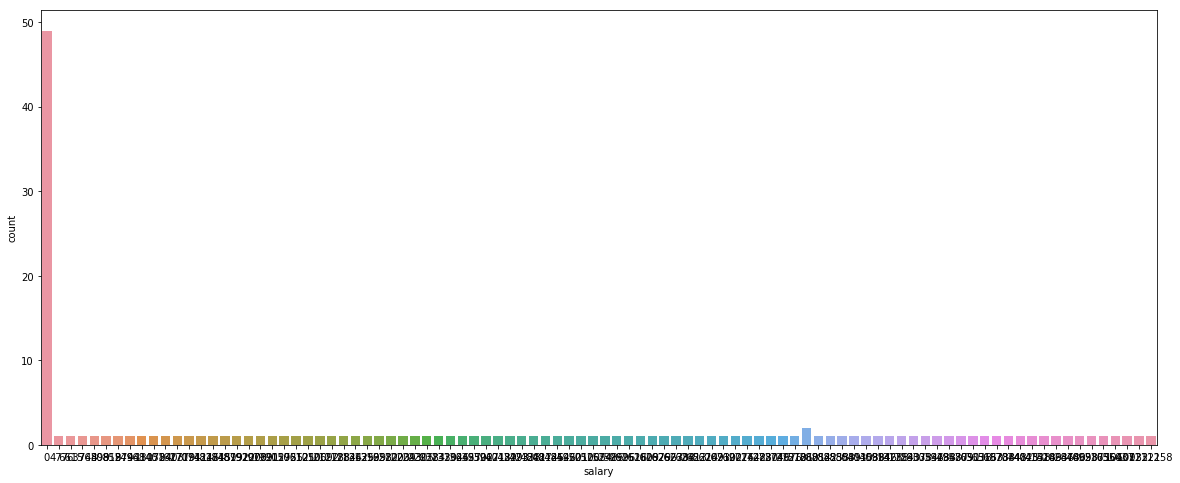

In [121]:
plt.subplots(figsize=(20,8))
sns.countplot(df['salary'])

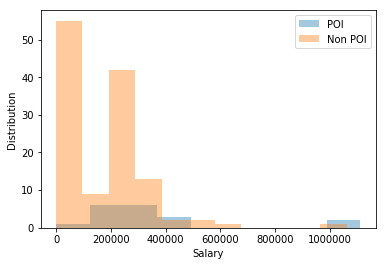

In [122]:
sns.distplot(df_poi['salary'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['salary'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Salary')
plt.ylabel('Distribution')
plt.legend()

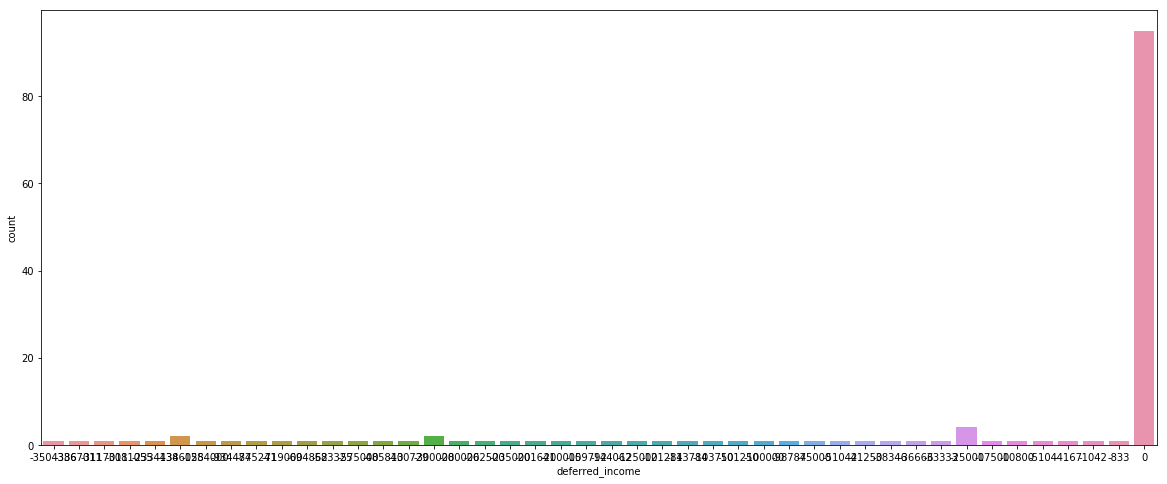

In [123]:
plt.subplots(figsize=(20,8))
sns.countplot(df['deferred_income'])

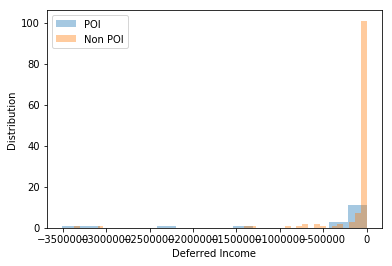

In [124]:
sns.distplot(df_poi['deferred_income'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['deferred_income'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Deferred Income')
plt.ylabel('Distribution')
plt.legend()

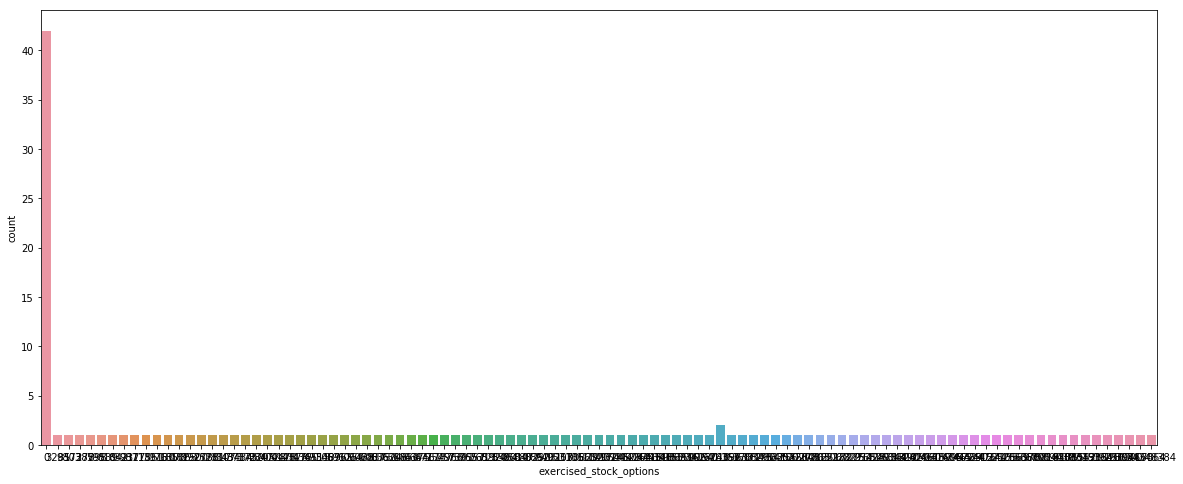

In [125]:
plt.subplots(figsize=(20,8))
sns.countplot(df['exercised_stock_options'])

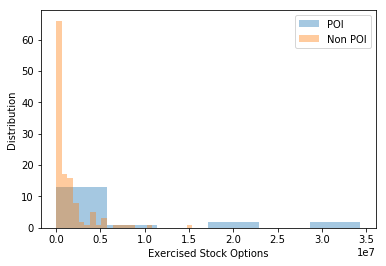

In [126]:
sns.distplot(df_poi['exercised_stock_options'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['exercised_stock_options'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Exercised Stock Options')
plt.ylabel('Distribution')
plt.legend()

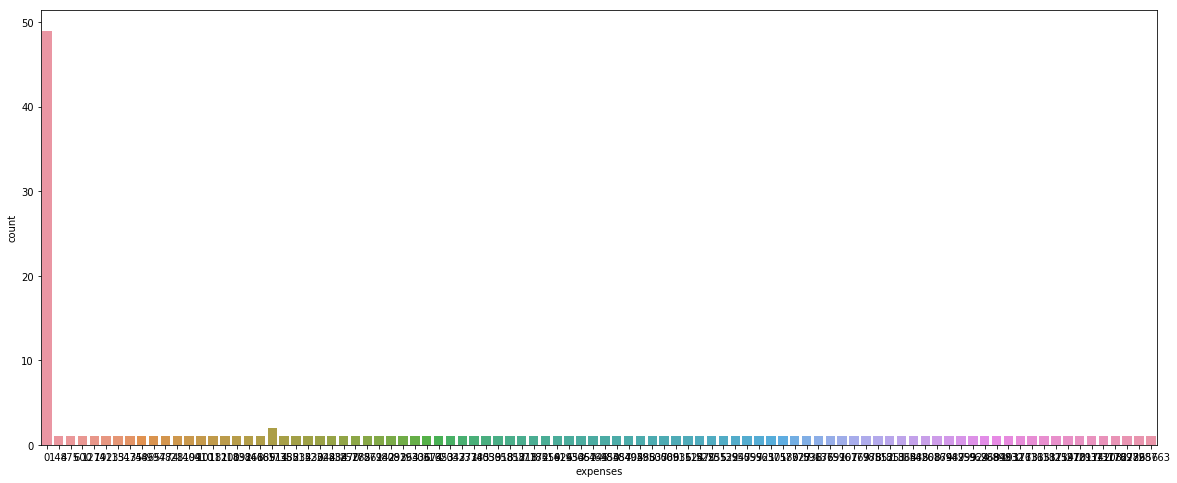

In [127]:
plt.subplots(figsize=(20,8))
sns.countplot(df['expenses'])

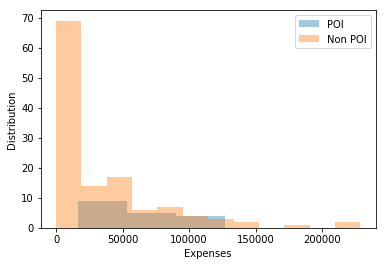

In [128]:
sns.distplot(df_poi['expenses'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['expenses'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Expenses')
plt.ylabel('Distribution')
plt.legend()

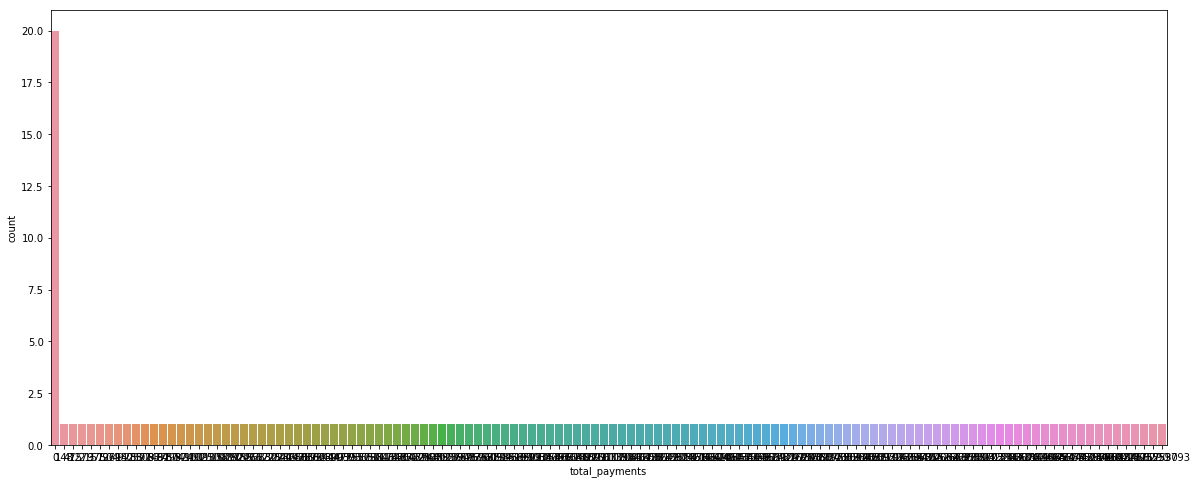

In [129]:
plt.subplots(figsize=(20,8))
sns.countplot(df['total_payments'])

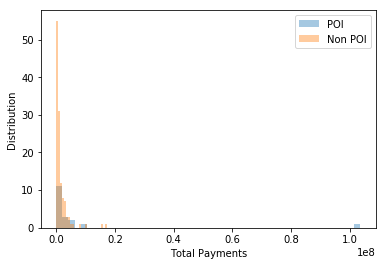

In [130]:
sns.distplot(df_poi['total_payments'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['total_payments'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Total Payments')
plt.ylabel('Distribution')
plt.legend()

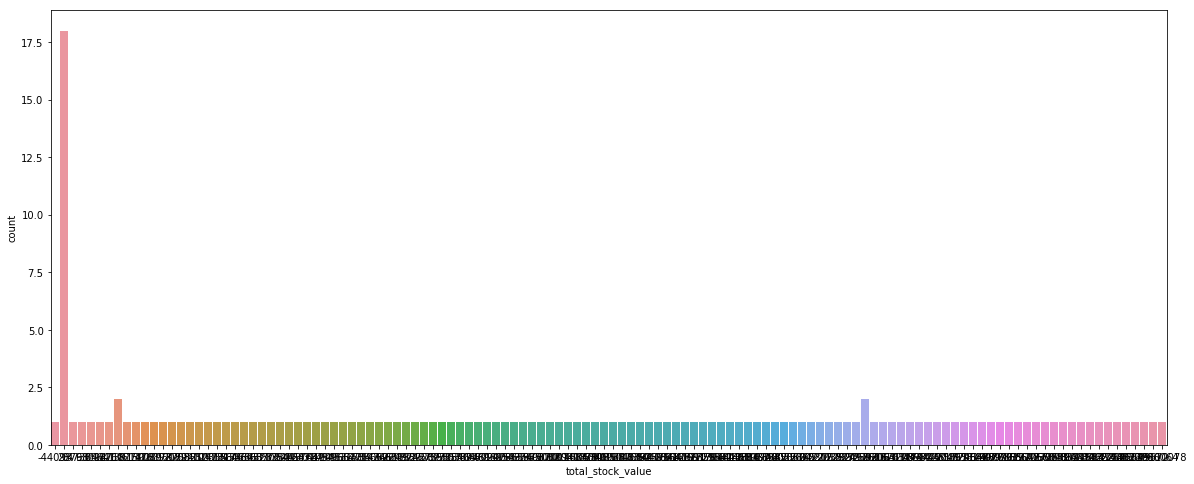

In [131]:
plt.subplots(figsize=(20,8))
sns.countplot(df['total_stock_value'])

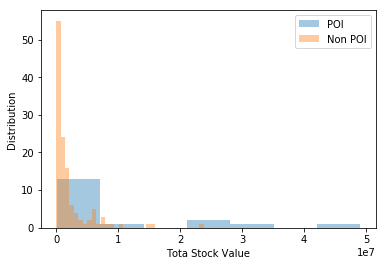

In [132]:
sns.distplot(df_poi['total_stock_value'],kde=0, norm_hist=False, label = 'POI')
sns.distplot(df_npoi['total_stock_value'],kde=0, norm_hist=False, label = 'Non POI')
plt.xlabel('Tota Stock Value')
plt.ylabel('Distribution')
plt.legend()

#### Summary of above analysis.

It looks like because the of the distribution in the data.

Most of the data points are either NaN/0, and tough to draw any conclusions form that.

Also, for most features explored above if compare the distribution of POI vs Non-POI it is mostly similar.

Some differences can be seen in Exercised stock options and total stock value.

Maybe there is something interesting their which we can explore further.

Based on limited inferences from univariate analysis let's try and compare multiple features on how they viaried with each other, also let's try and engineer some feature and see if they had any different distributions and if we can see if they impacted the POI/Not-POI

Let's see how both salary and bonus varies with each other

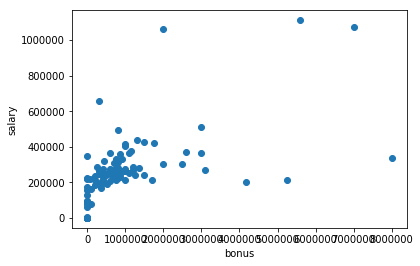

In [133]:
plt.plot(df['bonus'],df['salary'],"o")
plt.xlabel('bonus')
plt.ylabel('salary')

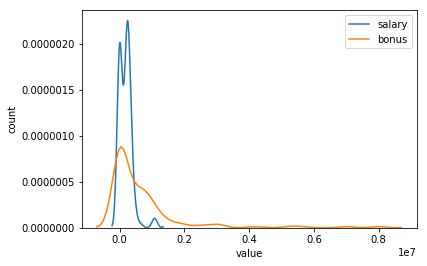

In [134]:
p1 = sns.kdeplot(df['salary'])
p2 = sns.kdeplot(df['bonus'])
plt.xlabel('value')
plt.ylabel('count')

Let's See if total stock value and exercised stock options had any relation with poi or not.

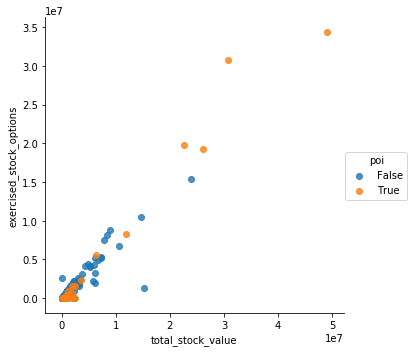

In [135]:
#plt.plot(df['total_stock_value'],df['exercised_stock_options'],"o")
sns.lmplot(x="total_stock_value", y="exercised_stock_options",data = df,fit_reg=False, hue = 'poi')
plt.xlabel('total_stock_value')
plt.ylabel('exercised_stock_options')

exercised_stock_options and total_stock_value looks like have a corelation, let's create a new feature to see how it is dostributed

In [136]:
df['exercised_stock_options'] = df['exercised_stock_options'].astype('int') 
df['total_stock_value'] = df['total_stock_value'].astype('int') 
df['eso/tsv'] = df['exercised_stock_options'] / df['total_stock_value']

In [137]:
df_poi = df[df['poi'] == True]
df_npoi = df[df['poi'] != True]

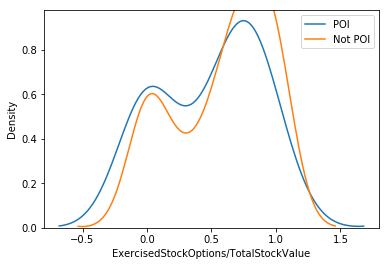

In [138]:
#sns.countplot(df['eso/tsv'])

p1 = sns.kdeplot(df_poi['eso/tsv'],label = 'POI')
p2 = sns.kdeplot(df_npoi['eso/tsv'],label = 'Not POI')

plt.xlabel('ExercisedStockOptions/TotalStockValue')
plt.ylabel('Density')
plt.legend()

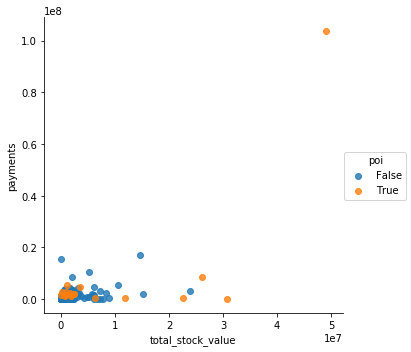

In [139]:
sns.lmplot(x="total_stock_value", y="total_payments",data = df,fit_reg=False, hue = 'poi')
plt.xlabel('total_stock_value')
plt.ylabel('payments')

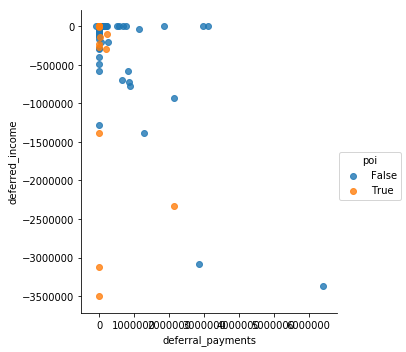

In [140]:
sns.lmplot(x="deferral_payments", y="deferred_income",data = df,fit_reg=False, hue = 'poi')
plt.xlabel('deferral_payments')
plt.ylabel('deferred_income')

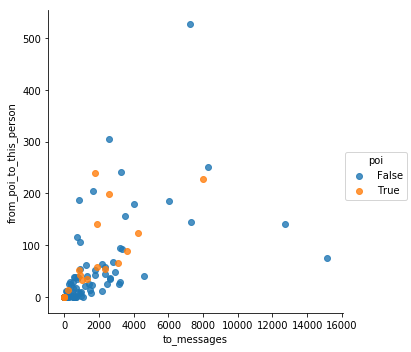

In [141]:
sns.lmplot(x="to_messages", y="from_poi_to_this_person",data = df,fit_reg=False, hue = 'poi')
plt.xlabel('to_messages')
plt.ylabel('from_poi_to_this_person')

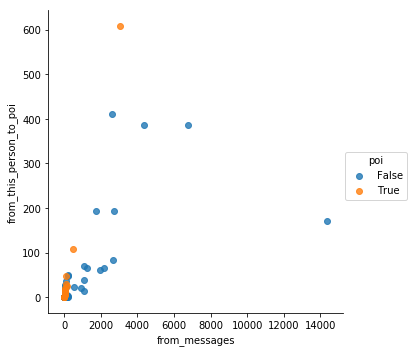

In [142]:
sns.lmplot(x="from_messages", y="from_this_person_to_poi",data = df,fit_reg=False, hue = 'poi')
plt.xlabel('from_messages')
plt.ylabel('from_this_person_to_poi')

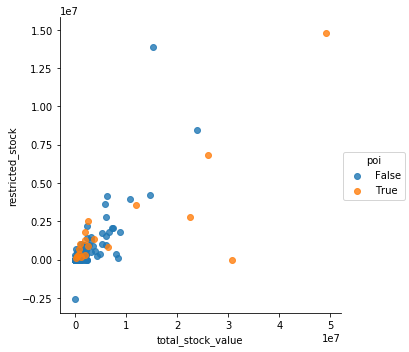

In [143]:
sns.lmplot(x="total_stock_value", y="restricted_stock",data = df,fit_reg=False, hue = 'poi')
plt.xlabel('total_stock_value')
plt.ylabel('restricted_stock')

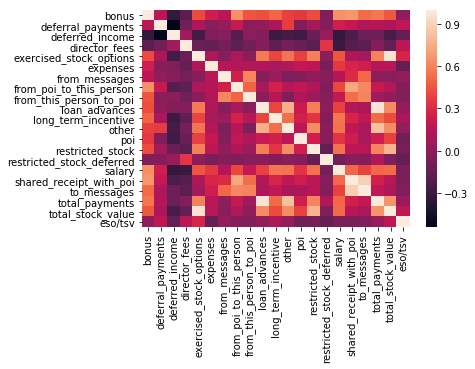

In [144]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Feature Selection

For actuall processing instead of using '0' for NaN using numpy.nan

In [145]:
df_processing = df_backup.copy()

In [146]:
df_processing.replace(to_replace='NaN',value=np.nan, inplace=True )

In [147]:
df_processing.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
0,600000.0,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299.0,29.0,38.0,1.0,...,1740.0,False,585062.0,NaN,365788.0,702.0,807.0,1061827.0,585062.0,METTS MARK
1,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
2,350000.0,NaN,-400729.0,NaN,steven.elliott@enron.com,4890344.0,78552.0,NaN,NaN,NaN,...,12961.0,False,1788391.0,NaN,170941.0,NaN,NaN,211725.0,6678735.0,ELLIOTT STEVEN
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850.0,NaN,12.0,10.0,0.0,...,NaN,False,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0,CORDES WILLIAM R
4,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,11350.0,True,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0,HANNON KEVIN P


First let's try and select the features manually based on exploration instead of using any of the alogorithms like K-Best.



Dropping 'email_address' and 'persons' as well

In [148]:
df_processing.drop('email_address', axis=1, inplace=True)
df_processing.drop('persons', axis=1, inplace=True)



In [149]:
df_processing.axes[1].tolist()

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

Benchmarks without any feature selection

In [150]:
test_labels_init = df_processing['poi'].copy(deep=True).astype(int).as_matrix()
test_features_init = (df_processing.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
test_shuffle_init = StratifiedShuffleSplit(test_labels_init, 4, test_size=0.3, random_state=0)
clf_rfc_init = RandomForestClassifier(n_estimators=10,)

In [151]:
list_cols_init = list(df_processing.columns.values)
list_cols_init.remove('poi')
list_cols_init.insert(0, 'poi')#poi has to be first feature
data = df_processing[list_cols_init].fillna(0).to_dict(orient='records')
enron_data_sub_init = {}
counter = 0
for item in data:
    enron_data_sub_init[counter] = item
    counter += 1

In [152]:
test_classifier(clf_rfc_init, enron_data_sub_init, list_cols_init)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85127	Precision: 0.31754	Recall: 0.10050	F1: 0.15268	F2: 0.11641
	Total predictions: 15000	True positives:  201	False positives:  432	False negatives: 1799	True negatives: 12568



Based on the EDA. Let's start removing features that at least eleminate those features that have too many NaNs.

In [153]:
df_processing.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In [154]:
nans = []
features = df_processing.axes[1].tolist()

for i,k in enumerate(df_processing.isnull().sum()):
    if k > 75:
        nans.append(features[i])

In [155]:
nans

['deferral_payments',
 'deferred_income',
 'director_fees',
 'loan_advances',
 'long_term_incentive',
 'restricted_stock_deferred']

In [156]:
for c, s in df_processing.iteritems():
    if(c in nans):
        df_processing.drop(c, axis=1, inplace=True)

In [66]:

features = df_processing.axes[1].tolist()
features

['bonus',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'poi',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

Let's do some benchmarks before feature creation

In [157]:
features_before = df_processing.axes[1].tolist()
features_before

['bonus',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'poi',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [158]:
test_labels_before = df_processing['poi'].copy(deep=True).astype(int).as_matrix()
test_features_before = (df_processing.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
test_shuffle_before = StratifiedShuffleSplit(test_labels_before, 4, test_size=0.3, random_state=0)
clf_rfc_before = RandomForestClassifier(n_estimators=10,)

In [159]:
list_cols_before = list(df_processing.columns.values)
list_cols_before.remove('poi')
list_cols_before.insert(0, 'poi')#poi has to be first feature
data = df_processing[list_cols_before].fillna(0).to_dict(orient='records')
enron_data_sub_before = {}
counter = 0
for item in data:
    enron_data_sub_before[counter] = item
    counter += 1

In [160]:
test_classifier(clf_rfc_before, enron_data_sub_before, list_cols_before)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.84553	Precision: 0.26379	Recall: 0.08850	F1: 0.13253	F2: 0.10206
	Total predictions: 15000	True positives:  177	False positives:  494	False negatives: 1823	True negatives: 12506



### Feature Creation

we are gonna create new features using ->

exercised_stock_options, total_stock_value, from_messages, from_poi_to_this_person,from_this_person_to_poi,to_messages


In [161]:
df_processing['eso/tsv'] = df_processing['exercised_stock_options'] / df_processing['total_stock_value']
df_processing.drop(['exercised_stock_options','total_stock_value'], axis=1, inplace=True)

Benchmarks only using 'eso/tsv' feature

In [162]:
test_labels_eso = df_processing['poi'].copy(deep=True).astype(int).as_matrix()
test_features_eso = (df_processing.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
test_shuffle_eso = StratifiedShuffleSplit(test_labels_eso, 4, test_size=0.3, random_state=0)
clf_rfc_eso = RandomForestClassifier(n_estimators=10,)

In [163]:
list_cols_eso = list(df_processing.columns.values)
list_cols_eso.remove('poi')
list_cols_eso.insert(0, 'poi')#poi has to be first feature
data = df_processing[list_cols_eso].fillna(0).to_dict(orient='records')
enron_data_sub_eso = {}
counter = 0
for item in data:
    enron_data_sub_eso[counter] = item
    counter += 1

In [164]:
test_classifier(clf_rfc_eso, enron_data_sub_eso, list_cols_eso)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.84500	Precision: 0.21934	Recall: 0.06350	F1: 0.09849	F2: 0.07402
	Total predictions: 15000	True positives:  127	False positives:  452	False negatives: 1873	True negatives: 12548



In [165]:
df_test_proc = df_processing.copy()

In [166]:
df_test_proc.drop('eso/tsv', axis=1, inplace=True)

In [167]:
df_test_proc['from_poi/to_msg'] = df_test_proc['from_poi_to_this_person']/df_test_proc['to_messages']
df_test_proc['to_poi/from_msg'] = df_test_proc['from_this_person_to_poi']/df_test_proc['from_messages']
df_test_proc.drop(['from_messages', 'from_poi_to_this_person','from_this_person_to_poi','to_messages'], axis=1, inplace=True)

In [168]:
test_labels_em = df_test_proc['poi'].copy(deep=True).astype(int).as_matrix()
test_features_em = (df_test_proc.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
test_shuffle_em = StratifiedShuffleSplit(test_labels_em, 4, test_size=0.3, random_state=0)
clf_rfc_em = RandomForestClassifier(n_estimators=10,)

In [169]:
list_cols_em = list(df_test_proc.columns.values)
list_cols_em.remove('poi')
list_cols_em.insert(0, 'poi')#poi has to be first feature
data = df_test_proc[list_cols_em].fillna(0).to_dict(orient='records')
enron_data_sub_em = {}
counter = 0
for item in data:
    enron_data_sub_em[counter] = item
    counter += 1

In [170]:
test_classifier(clf_rfc_em, enron_data_sub_em, list_cols_em)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85513	Precision: 0.38036	Recall: 0.13750	F1: 0.20198	F2: 0.15763
	Total predictions: 15000	True positives:  275	False positives:  448	False negatives: 1725	True negatives: 12552



In [171]:
df_processing['from_poi/to_msg'] = df_processing['from_poi_to_this_person']/df_processing['to_messages']

In [172]:
df_processing['to_poi/from_msg'] = df_processing['from_this_person_to_poi']/df_processing['from_messages']

In [173]:
features = df_processing.axes[1].tolist()
features

['bonus',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'poi',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'eso/tsv',
 'from_poi/to_msg',
 'to_poi/from_msg']

Dropping the features -> exercised_stock_options, total_stock_value, from_messages, from_poi_to_this_person,from_this_person_to_poi,to_messages

As they were to used to create new features

In [174]:
to_drop = ['from_messages', 'from_poi_to_this_person','from_this_person_to_poi','to_messages']

In [175]:
df_processing.drop(to_drop, axis=1, inplace=True)

In [176]:
features = df_processing.axes[1].tolist()
features

['bonus',
 'expenses',
 'other',
 'poi',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'total_payments',
 'eso/tsv',
 'from_poi/to_msg',
 'to_poi/from_msg']

In [182]:
df_processing.head()

,bonus,expenses,other,poi,restricted_stock,salary,shared_receipt_with_poi,total_payments,eso/tsv,from_poi/to_msg,to_poi/from_msg
0,600000.0,94299.0,1740.0,False,585062.0,365788.0,702.0,1061827.0,NaN,0.047088,0.034483
1,1200000.0,11200.0,2660303.0,False,3942714.0,267102.0,NaN,5634343.0,0.628860,NaN,NaN
2,350000.0,78552.0,12961.0,False,1788391.0,170941.0,NaN,211725.0,0.732226,NaN,NaN
3,NaN,NaN,NaN,False,386335.0,NaN,58.0,NaN,0.627875,0.013089,0.000000
4,1500000.0,34039.0,11350.0,True,853064.0,243293.0,1035.0,288682.0,0.866522,0.030622,0.656250


In [178]:
test_labels = df_processing['poi'].copy(deep=True).astype(int).as_matrix()
test_features = (df_processing.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
test_shuffle = StratifiedShuffleSplit(test_labels, 4, test_size=0.3, random_state=0)

In [179]:
clf_rfc = RandomForestClassifier(n_estimators=10,)

In [185]:
list_cols = list(df_processing.columns.values)
list_cols.remove('poi')
list_cols.insert(0, 'poi')#poi has to be first feature
data = df_processing[list_cols].fillna(0).to_dict(orient='records')
enron_data_sub = {}
counter = 0
for item in data:
    enron_data_sub[counter] = item
    counter += 1

In [186]:
list_cols

['poi',
 'bonus',
 'expenses',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'total_payments',
 'eso/tsv',
 'from_poi/to_msg',
 'to_poi/from_msg']

In [187]:
enron_data_sub

{0: {'bonus': 600000.0,
  'eso/tsv': 0.0,
  'expenses': 94299.0,
  'from_poi/to_msg': 0.04708798017348203,
  'other': 1740.0,
  'poi': False,
  'restricted_stock': 585062.0,
  'salary': 365788.0,
  'shared_receipt_with_poi': 702.0,
  'to_poi/from_msg': 0.034482758620689655,
  'total_payments': 1061827.0},
 1: {'bonus': 1200000.0,
  'eso/tsv': 0.6288601858299968,
  'expenses': 11200.0,
  'from_poi/to_msg': 0.0,
  'other': 2660303.0,
  'poi': False,
  'restricted_stock': 3942714.0,
  'salary': 267102.0,
  'shared_receipt_with_poi': 0.0,
  'to_poi/from_msg': 0.0,
  'total_payments': 5634343.0},
 2: {'bonus': 350000.0,
  'eso/tsv': 0.7322260877246963,
  'expenses': 78552.0,
  'from_poi/to_msg': 0.0,
  'other': 12961.0,
  'poi': False,
  'restricted_stock': 1788391.0,
  'salary': 170941.0,
  'shared_receipt_with_poi': 0.0,
  'to_poi/from_msg': 0.0,
  'total_payments': 211725.0},
 3: {'bonus': 0.0,
  'eso/tsv': 0.6278746080900803,
  'expenses': 0.0,
  'from_poi/to_msg': 0.013089005235602094,

In [188]:
test_classifier(clf_rfc, enron_data_sub, list_cols)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85480	Precision: 0.36834	Recall: 0.12450	F1: 0.18610	F2: 0.14350
	Total predictions: 15000	True positives:  249	False positives:  427	False negatives: 1751	True negatives: 12573



### Chossing and Training Classifiers

Startified Shuffle split, on 

In [190]:
model_labels = df_processing['poi'].copy(deep=True).astype(int).as_matrix()
model_features = (df_processing.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
shuffle = StratifiedShuffleSplit(model_labels, 4, test_size=0.3, random_state=0)

In [191]:
model_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

In [192]:
model_features

array([[  6.00000000e+05,   9.42990000e+04,   1.74000000e+03, ...,
          0.00000000e+00,   4.70879802e-02,   3.44827586e-02],
       [  1.20000000e+06,   1.12000000e+04,   2.66030300e+06, ...,
          6.28860186e-01,   0.00000000e+00,   0.00000000e+00],
       [  3.50000000e+05,   7.85520000e+04,   1.29610000e+04, ...,
          7.32226088e-01,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  6.00000000e+05,   0.00000000e+00,   0.00000000e+00, ...,
          8.49455067e-01,   0.00000000e+00,   0.00000000e+00],
       [  8.00000000e+05,   9.62680000e+04,   8.91000000e+02, ...,
          7.08537005e-01,   2.17341040e-01,   5.00000000e-01],
       [  6.00000000e+05,   1.25978000e+05,   2.00308000e+05, ...,
          4.94162195e-01,   5.95647194e-02,   3.75000000e-01]])

##### RandomForestClassifier

In [193]:
clf_rfc = RandomForestClassifier(n_estimators=10,)
scored_rfc = cross_validation.cross_val_score(clf_rfc, model_features, model_labels)
predicted_rfc = cross_val_predict(clf_rfc, model_features,model_labels, cv=10)
precision_score_rfc = metrics.precision_score(model_labels, predicted_rfc) 

In [194]:
scored_rfc

array([ 0.83673469,  0.87755102,  0.875     ])

In [195]:
precision_score_rfc

0.5

In [196]:
test_classifier(clf_rfc, enron_data_sub, list_cols)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85373	Precision: 0.35819	Recall: 0.12250	F1: 0.18256	F2: 0.14106
	Total predictions: 15000	True positives:  245	False positives:  439	False negatives: 1755	True negatives: 12561



##### Gaussian Naive Bayes

In [197]:
clf_gnb = GaussianNB()
scored_gnb = cross_validation.cross_val_score(clf_gnb, model_features, model_labels)
predicted_gnb = cross_val_predict(clf_gnb, model_features,model_labels, cv=10)
precision_score_gnb = metrics.precision_score(model_labels, predicted_gnb)

In [198]:
scored_gnb

array([ 0.14285714,  0.10204082,  0.72916667])

In [199]:
precision_score_gnb

0.109375

In [200]:
test_classifier(clf_gnb, enron_data_sub, list_cols)

GaussianNB(priors=None)
	Accuracy: 0.20553	Precision: 0.12250	Recall: 0.80450	F1: 0.21262	F2: 0.38065
	Total predictions: 15000	True positives: 1609	False positives: 11526	False negatives:  391	True negatives: 1474



#### SVC

In [201]:
clf_svc = SVC()
scored_svc = cross_validation.cross_val_score(clf_svc, model_features, model_labels)
predicted_svc = cross_val_predict(clf_svc, model_features,model_labels, cv=10)
precision_score_svc = metrics.precision_score(model_labels, predicted_svc)

/Users/sushantgandhi/anaconda3/envs/mlnd/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [202]:
scored_svc

array([ 0.87755102,  0.87755102,  0.875     ])

In [203]:
predicted_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

^^Got Divide by Zero error

##### AdaBoost

In [204]:
clf_abc = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,learning_rate=1.0, n_estimators=50, random_state=None)
scored_abc = cross_validation.cross_val_score(clf_abc, model_features, model_labels)
predicted_abc = cross_val_predict(clf_abc, model_features,model_labels, cv=10)
precision_score_abc = metrics.precision_score(model_labels, predicted_abc)

In [212]:
scored_abc

array([ 0.87755102,  0.87755102,  0.8125    ])

In [213]:
precision_score_abc

0.38461538461538464

In [207]:
test_classifier(clf_abc, enron_data_sub, list_cols)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
	Accuracy: 0.83640	Precision: 0.36005	Recall: 0.29200	F1: 0.32247	F2: 0.30347
	Total predictions: 15000	True positives:  584	False positives: 1038	False negatives: 1416	True negatives: 11962



##### Bagging

In [214]:
clf_bag = BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
scored_bag = cross_validation.cross_val_score(clf_bag, model_features, model_labels)
predicted_bag = cross_val_predict(clf_bag, model_features,model_labels, cv=10)
precision_score_bag = metrics.precision_score(model_labels, predicted_bag)

In [215]:
scored_bag

array([ 0.81632653,  0.85714286,  0.85416667])

In [216]:
precision_score_bag

0.42857142857142855

In [217]:
test_classifier(clf_bag, enron_data_sub, list_cols)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
	Accuracy: 0.85080	Precision: 0.37093	Recall: 0.17100	F1: 0.23409	F2: 0.19166
	Total predictions: 15000	True positives:  342	False positives:  580	False negatives: 1658	True negatives: 12420



### Parameter Tuning

After above experimentation, I am chossing Adabost and randomforest, as they  had most promising reuslts, and with proper tuning can be used to get better overall metrics

For Paramter Tuning, there are various methods, like manual comparison, plotting evaluation metrics, I have used GridSearchCV to get optmised parameter values.

Also we have a requirement that the precision and recall must be at least 0.3, For that there a custom scoring funciton needs to be defined

In [218]:
cv = cross_validation.StratifiedShuffleSplit(model_labels, n_iter=10)

def scoring(estimator, features_test, labels_test):
     labels_pred = estimator.predict(features_test)
     p = metrics.precision_score(labels_test, labels_pred, average='micro')
     r = metrics.recall_score(labels_test, labels_pred, average='micro')
     if p > 0.3 and r > 0.3:
            return metrics.f1_score(labels_test, labels_pred, average='macro')
     return 0


#### AdaBoost

In [219]:
num_iteration = [100,300,500,850,1000,2000,5000]
learning = [0.01, 0.1, 0.6, 1.0, 1.5, 2.0]

clf_adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8))

parameters_adaboost = {'n_estimators':num_iteration,'learning_rate':learning,'algorithm':['SAMME.R','SAMME']}
adaclf = GridSearchCV(clf_adb, parameters_adaboost, scoring = scoring, cv = cv)
adaclf.fit(model_features, model_labels)


/Users/sushantgandhi/anaconda3/envs/mlnd/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 0 ..., 0 1], n_iter=10, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 300, 500, 850, 1000, 2000, 5000], 'learning_rate': [0.01, 0.1, 0.6, 1.0, 1.5, 2.0], 'algorithm': ['SAMME.R', 'SAMME']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function scoring at 0x1a1ff6b6e0>, verbose=0)

In [220]:
adaclf.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.6, n_estimators=5000, random_state=None)

In [221]:
adaclf.best_score_

0.6553472067385111

#### RandomForest

In [222]:
parameters = {'max_depth': [2,3,4,5,6],'min_samples_split':[2,3,4,5], 'n_estimators':[10,20,50], 'min_samples_leaf':[1,2,3,4], 'criterion':('gini', 'entropy')}
clf_rfc = RandomForestClassifier()
rfclf = GridSearchCV(clf_rfc, parameters, scoring = scoring, cv = cv)
rfclf.fit(model_features, model_labels)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 0 ..., 0 1], n_iter=10, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5], 'n_estimators': [10, 20, 50], 'criterion': ('gini', 'entropy'), 'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function scoring at 0x1a1ff6b6e0>, verbose=0)

In [223]:
rfclf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [224]:
rfclf.best_score_

0.70965608465608454

In [225]:
rf_best_clf = rfclf.best_estimator_

In [226]:
test_classifier(rf_best_clf, enron_data_sub, list_cols)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.86193	Precision: 0.45170	Recall: 0.16600	F1: 0.24278	F2: 0.19004
	Total predictions: 15000	True positives:  332	False positives:  403	False negatives: 1668	True negatives: 12597



In [227]:
ada_best_clf = adaclf.best_estimator_
test_classifier(ada_best_clf, enron_data_sub, list_cols)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.6, n_estimators=5000, random_state=None)
	Accuracy: 0.82380	Precision: 0.34580	Recall: 0.36050	F1: 0.35300	F2: 0.35746
	Total predictions: 15000	True positives:  721	False positives: 1364	False negatives: 1279	True negatives: 11636



Both Precision and Recall of AdaBoost is above 0.3, going with that for final dumping of classifier. (Done in Python File)

#### List of Resources

- scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- http://www.investopedia.com/updates/enron-scandal-summary/
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/